<a href="https://colab.research.google.com/github/kari-hue/CoffeeLeafDiseaseDetectionSystem/blob/main/FinalYearProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This program classifies images


In [ ]:
#Import the libraries

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers

from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data_path = "/content/drive/MyDrive/Coffee leaf dataset/dataset/symptom/train"
validation_data_path ="/content/drive/MyDrive/Coffee leaf dataset/dataset/symptom/val"

In [ ]:
#show augmented images

def plotImages(images_arr):
  fig, axes = plt.subplots(1,5,figsize = (20,20))
  axes = axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [ ]:
#This is the augmentation configuration we will use for training
#It generate more images using below parameters

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range = 180,
                                      width_shift_range= 0.1,
                                      height_shift_range= 0.1,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True,
                                      fill_mode = 'nearest')
                                  
#This is a generator that will read pictures found in at 
#At train_data_path,and indefinitely generate
# Batches of augmented image data

training_data = training_datagen.flow_from_directory(train_data_path,
                                                     target_size = (250,250),
                                                     batch_size = 32,
                                                     class_mode='sparse')
                                                    


Found 1905 images belonging to 5 classes.


In [ ]:
training_data.class_indices  ## Display the class

{'1_health': 0, '2_miner': 1, '3_rust': 2, '4_phoma': 3, '5_cercospora': 4}

In [ ]:
# This is the augmentation configuration we will use for validation
#Only rescaling

valid_datagen = ImageDataGenerator(rescale = 1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                               target_size = (250,250),
                                               batch_size = 32,
                                               class_mode='sparse')

Found 408 images belonging to 5 classes.


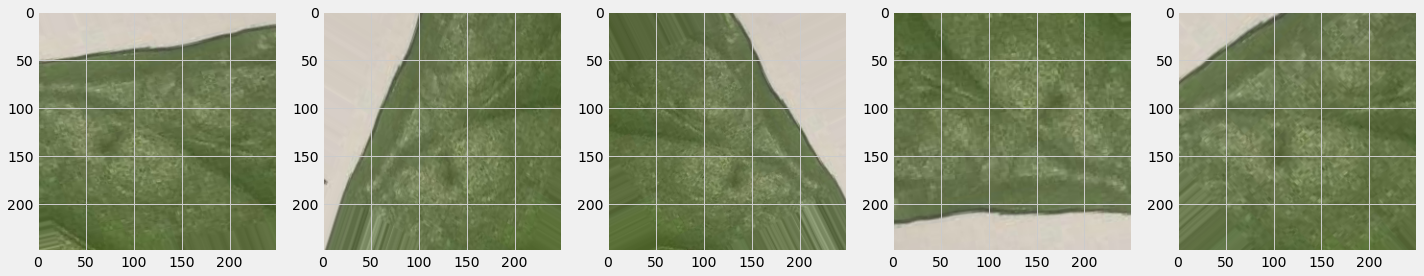

In [ ]:
#showing the augmented images

images = [training_data[4][0][0] for i in range(5)]
plotImages(images)

In [ ]:
#Save best model using vall accuracy

model_path = '/content/drive/MyDrive/Coffee leaf dataset/pred_coffee_disease.h5'
checkpoint = ModelCheckpoint(model_path,monitor = 'val_accuracy',verbose = 1,save_best_only = True,mode = 'max')
callbacks_list = [ checkpoint ]

In [ ]:
cnn_model = cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=16, kernel_size=3,activation='relu', input_shape=[250, 250, 3]),
                                    
                                    keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu'),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Dropout(0.25),

                                    keras.layers.Conv2D(filters=64, kernel_size=3,activation='relu'),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Dropout(0.25),

                                    keras.layers.Conv2D(filters=128, kernel_size=3,activation='relu'),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Dropout(0.25),

                                    keras.layers.Flatten(),

                                    keras.layers.Dense(units = 500, activation='relu'),
                                    keras.layers.Dropout(0.4),
                                    keras.layers.Dense(units = 250, activation='relu'),
                                    keras.layers.Dropout(0.3),
                                    # output layer
                                    keras.layers.Dense(units =10, activation='softmax')
                                    

                                    
])
                                    

        


In [ ]:
## Compiling the model

cnn_model.compile(optimizer = Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 246, 246, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 123, 123, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 121, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 64)        0

In [ ]:
# Train cnn model

history = cnn_model.fit(training_data,
                        batch_size=128, 
                        epochs = 100,
                        #verbose =1,
                        validation_data = valid_data,
                        callbacks = callbacks_list)

Epoch 1/100
60/60 [==============================] - 694s 11s/step - loss: 1.8248 - accuracy: 0.3543 - val_loss: 1.2717 - val_accuracy: 0.5319

Epoch 00001: val_accuracy improved from -inf to 0.53186, saving model to /content/drive/MyDrive/Coffee leaf dataset/pred_coffee_disease.h5
Epoch 2/100
60/60 [==============================] - 33s 545ms/step - loss: 1.1256 - accuracy: 0.5297 - val_loss: 0.9693 - val_accuracy: 0.6225

Epoch 00002: val_accuracy improved from 0.53186 to 0.62255, saving model to /content/drive/MyDrive/Coffee leaf dataset/pred_coffee_disease.h5
Epoch 3/100
60/60 [==============================] - 35s 576ms/step - loss: 0.8511 - accuracy: 0.6609 - val_loss: 0.7076 - val_accuracy: 0.7083

Epoch 00003: val_accuracy improved from 0.62255 to 0.70833, saving model to /content/drive/MyDrive/Coffee leaf dataset/pred_coffee_disease.h5
Epoch 4/100
60/60 [==============================] - 32s 524ms/step - loss: 0.7543 - accuracy: 0.7102 - val_loss: 0.6066 - val_accuracy: 0.7672

In [ ]:
model_path2 = '/content/drive/MyDrive/Coffee leaf dataset/pred_coffee_disease.h5'
cnn_model.save(model_path2)

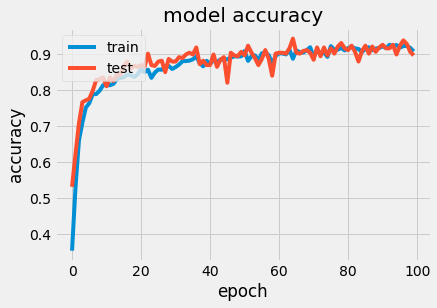

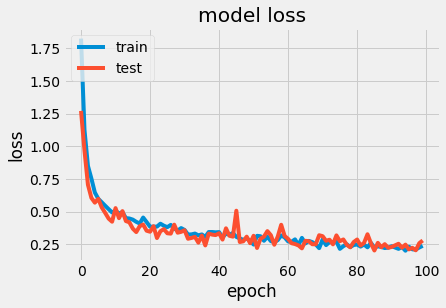

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
#history.history